# Udacity Data analysis nanodegree 
## project 1. Explore weather trends  
<br>        
- **Author: Wooyoul Na**  
<br>   
- **Date: March 11, 2021**  
<br>   
- **Country: South Korea**
<br>    

## 1. Introduction  
<br>    
 - This project is conducted to compare trends between local and global temperature. For this purpose, Local temperature in Seoul, Korea and global temperature data has been analyzed. 
<br>    
 - The SQL query has been used to extract data file for performing this project, and Python has been used to analyze about the weather trends of Seoul city and global temperature.  
<br>  
 - The descriptions of the overall process for extracting data and analyzing the weather trends are In the **2. Outline** part. This part contains SQL query to extract the data from the Udacity database.  
<br> 
 - The specific Python code and line chart have been presented in the **3. Procedure and Results** part. This contains some descriptions about the similarities and differences between local and global temperature trends. 
<br>  
  

## 2. Outline  
<br>   
### 1) Extracting data  
<br>   
 - **SQL query** has been used to join local and global temperature data and extract data file (.csv) that contains yearly average temperature of the 'Seoul' city in 'South Korea' and the global temperature.  
<br>    
 - To join and extract the csv data file, Following queries was first used to explore the form of each data.  
<br>   
```
select * from city_list;  
select * from city_data limit 10;  
select * from global_data limit 10;
```    
<br>   
 - After exploring the form of each data, Following query has been used to join between city_data of 'South Korea' and global_data. The result of following query has been downloaded by the 'csv' format. <br>    
```
select c.city, c.country, c.year, c.avg_temp as city_temp, g.avg_temp as glo_temp  
from city_data as c  
inner join global_data as g on c.year=g.year  
where country='South Korea' and city='Seoul';  
```  
<br>    
 - As a result, columns of the extracted data are following:  
   - ```city```: In this project, the ```city``` column contains just one value, 'Seoul'.    
   - ```country```: In this project, the ```country``` column contains just one value, 'South Korea'.     
   - ```year```  
   - ```city_temp``` : yearly average temperature of the city. In this project, ```city_temp``` means the yearly average temparature of Seoul.  
   - ```glo_temp``` : yearly average temperature of the global.     
<br>   

### 2) Calculating moving averages
<br>   
 - After downloading the yearly temperature data, **Python** has been used to analyze the data.  
<br>   
 - The **10-year moving averages** of local and global temperatures has been calculated by rolling mean. The specific process for calculating moving averages has been presented in **'3. Procedure and Results'**.
<br>   
 - Two columns that named ```city_ma_10``` and ```glo_ma_10``` has been created in the yearly temperature data. ```city_ma_10``` is the 10-years moving average of the temperature in 'Seoul', and ```glo_ma_10``` is the 10-years moving average of the global temperature.  
<br>   

### 3) Plotting line chart   
<br>   
 - After calculating 10-year moving averages of local and global temperatures, the line chart has been plotted by **matplotlib**.  
<br>   

### 4) Describing some observations about the similarities and differences between global and local average temperature  
<br>   
 - Finally, some observations has been described about the similarities and differences of trends between global and local moving average temperature.  

## 3. Procedure and Results  

### 1) Import packages and yearly temperature data  

In [1]:
## import numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## import yearly temperature data which was extracted by SQL query
dt_seoul = pd.read_csv('results_seoul.csv')

In [3]:
## first some observations in data frame
dt_seoul.head()

,city,country,year,city_temp,glo_temp
0,Seoul,South Korea,1839,9.47,7.63
1,Seoul,South Korea,1840,10.21,7.80
2,Seoul,South Korea,1841,9.44,7.69
3,Seoul,South Korea,1842,10.13,8.02
4,Seoul,South Korea,1843,10.33,8.17


### 2) Calculating 10-year moving averages  

In [4]:
## calculate 10-year moving average: rolling mean

### 10-year MA of Seoul city
dt_seoul['city_ma_10'] = dt_seoul['city_temp'].rolling(10).mean()

### 10-year MA of global temperagure
dt_seoul['glo_ma_10'] = dt_seoul['glo_temp'].rolling(10).mean()

In [5]:
## first 20 observations of data frame
dt_seoul.head(20)

,city,country,year,city_temp,glo_temp,city_ma_10,glo_ma_10
0,Seoul,South Korea,1839,9.47,7.63,NaN,NaN
1,Seoul,South Korea,1840,10.21,7.80,NaN,NaN
2,Seoul,South Korea,1841,9.44,7.69,NaN,NaN
3,Seoul,South Korea,1842,10.13,8.02,NaN,NaN
4,Seoul,South Korea,1843,10.33,8.17,NaN,NaN
5,Seoul,South Korea,1844,10.15,7.65,NaN,NaN
6,Seoul,South Korea,1845,10.25,7.85,NaN,NaN
7,Seoul,South Korea,1846,10.57,8.55,NaN,NaN
8,Seoul,South Korea,1847,10.59,8.09,NaN,NaN
9,Seoul,South Korea,1848,10.36,7.98,10.150,7.943


### 3) Plotting the line chart  

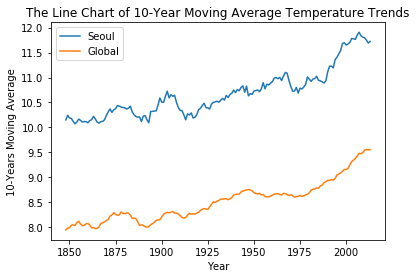

In [6]:
## line chart about 10-year MA of Seoul
plt.plot(dt_seoul["year"],dt_seoul["city_ma_10"],label="Seoul")

## line chart about 10-year MA of global
plt.plot(dt_seoul["year"],dt_seoul["glo_ma_10"],label="Global")

## Decoration of chart
plt.title("The Line Chart of 10-Year Moving Average Temperature Trends")
plt.xlabel("Year")
plt.ylabel("10-Years Moving Average")
plt.legend()
## print the line chart
plt.show()

### 4) Describing some observations  
<br>   
#### (1) Similarities   
<br>   
- Both average temperatures have been shown slowly increased trends due to climate change.  
<br>   
- Both average temperatures have been increased much faster Since the middle of 1980's.  
<br>   

#### (2) Differences  
<br>   
- The Overall years, the average temperature in Seoul is higher than the average temperatures in Global.  
<br>   
- In the middle of 1960's, The average temperature in Seoul has decreased slightly, but the global temperature has not changed noticeably.  